## In this file, we have tried to find out some correlation spefically for Females

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleanedFemale.csv")
df = df.drop("Gender", axis=1)
df.head(1)

,CGPA,10th Class Board,10th Class Science Marks (out of 100),10th Class Maths Marks (out of 100),10th Class English/Language Marks (out of 100),10th Class Overall Percentage,12th Class School Category,12th Class Board,12th Class Physics Marks (out of 100),12th Class Maths Marks (out of 100),...,12th Class English/Language Marks (out of 100),12th Class Overall Percentage,JEE Mains Session 1 Maths Percentile,JEE Mains Session 1 Physics Percentile,JEE Mains Session 1 Chemistry Percentile,JEE Mains Session 1 Overall Score,JEE Mains Session 2 Maths Percentile,JEE Mains Session 2 Physics Percentile,JEE Mains Session 2 Chemistry Percentile,JEE Mains Session 2 Overall Percentile
0,8.6,ICSE,83,89,86,91.8,Private School,ICSE,98.0,98.0,...,90,96.0,94.9,87.8,57.4,84.5,91.9,86.1,82.6,88.3


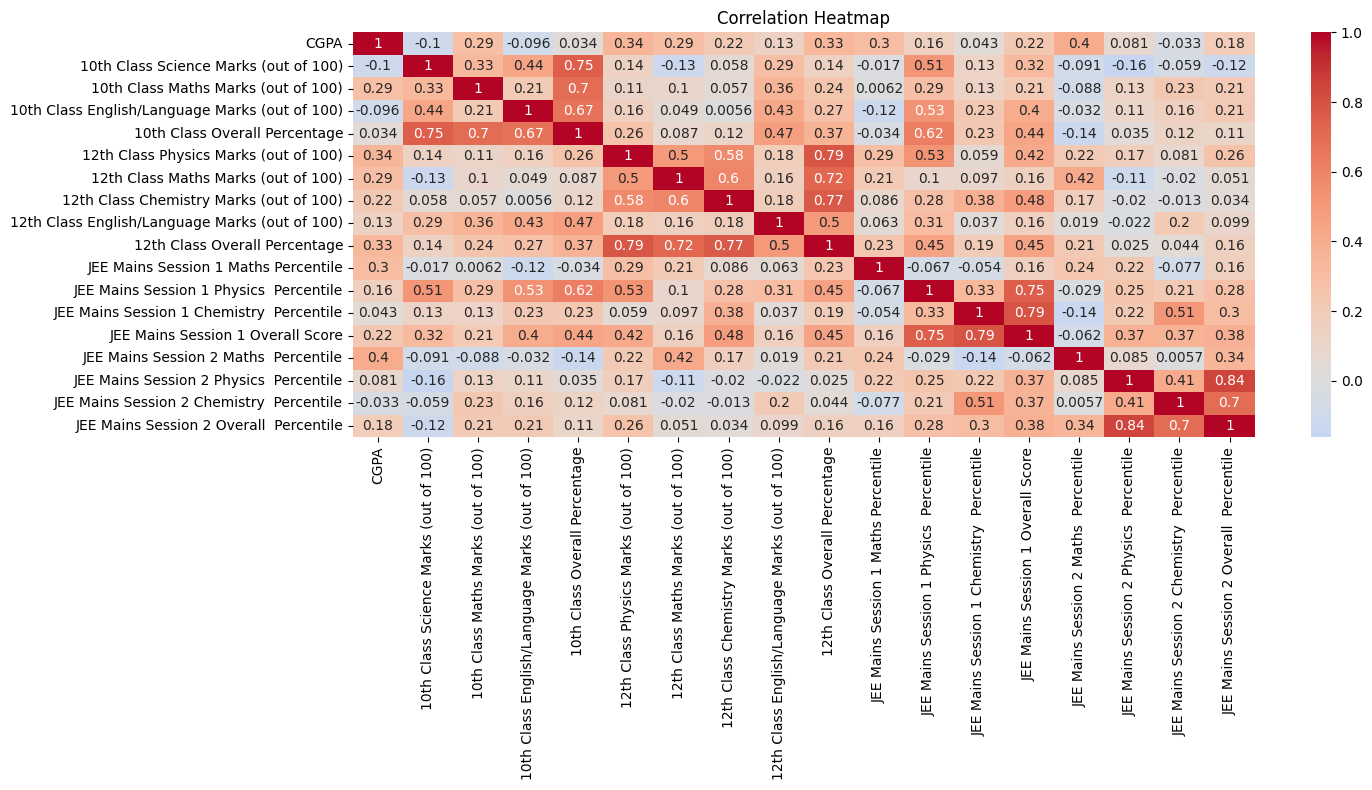

In [3]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corr()['CGPA'].sort_values(ascending=False)
# display(correlations)

plt.figure(figsize=(15, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [4]:
df =  df.drop(["10th Class Board","12th Class School Category","12th Class Board"], axis =1)

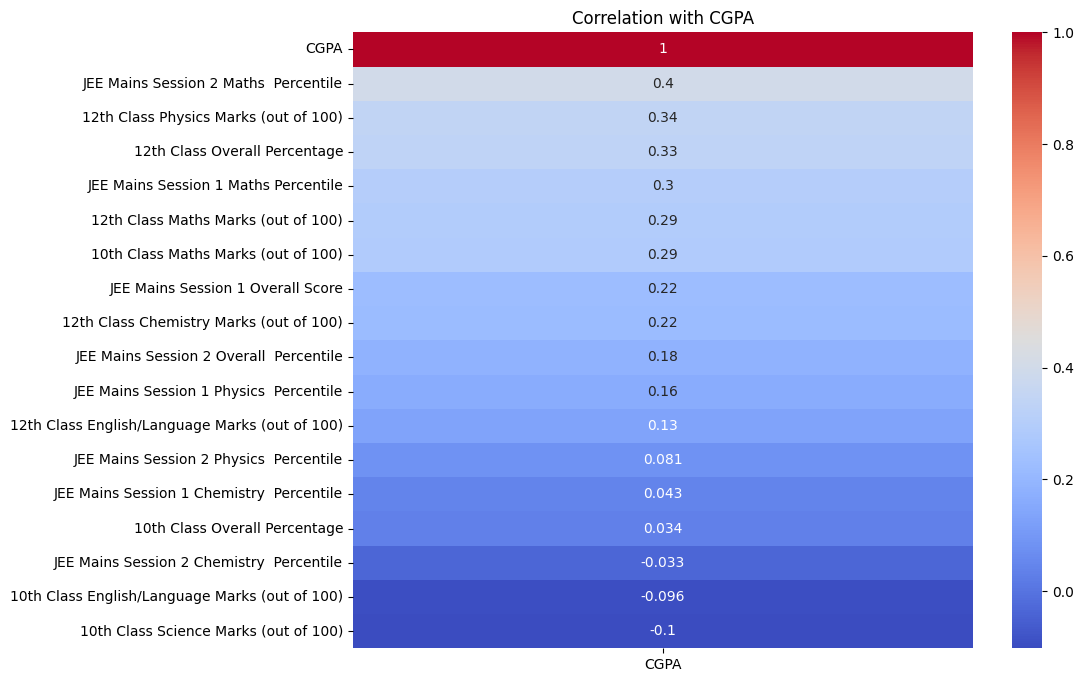

Features with correlation above threshold: ['CGPA', '10th Class Maths Marks (out of 100)', '12th Class Physics Marks (out of 100)', '12th Class Maths Marks (out of 100)', '12th Class Chemistry Marks (out of 100)', '12th Class Overall Percentage', 'JEE Mains Session 1 Maths Percentile', 'JEE Mains Session 1 Overall Score', 'JEE Mains Session 2 Maths  Percentile']


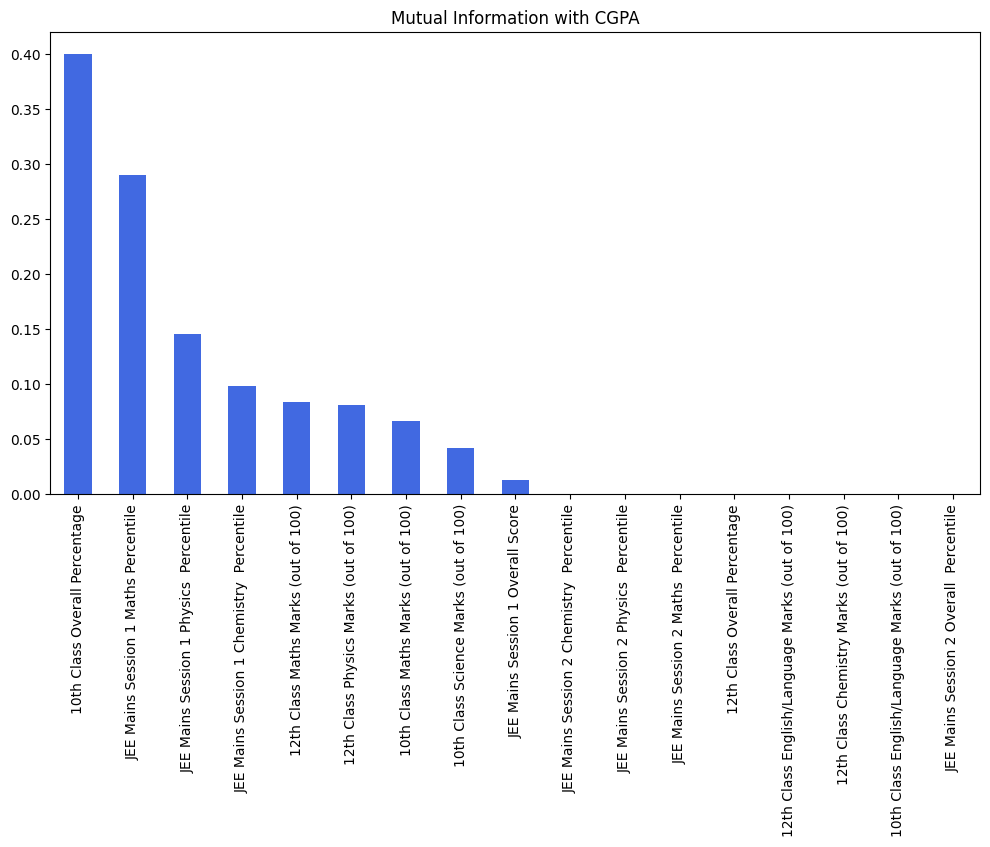

Top features by mutual information: 10th Class Overall Percentage                0.400206
JEE Mains Session 1 Maths Percentile         0.289961
JEE Mains Session 1 Physics  Percentile      0.145952
JEE Mains Session 1 Chemistry  Percentile    0.098721
12th Class Maths Marks (out of 100)          0.083384
dtype: float64


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlations with CGPA
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['CGPA']].sort_values(by='CGPA', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with CGPA")
plt.show()

# Select features with high correlation (threshold > 0.2 for example)
high_corr_features = corr_matrix['CGPA'][corr_matrix['CGPA'].abs() > 0.2].index.tolist()

print("Features with correlation above threshold:", high_corr_features)

# Using Mutual Information for better feature detection
X = df.drop(columns=['CGPA'])  # Features
y = df['CGPA']  # Target

# Compute mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)

# Plot mutual information
mutual_info_series.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='royalblue')
plt.title('Mutual Information with CGPA')
plt.show()

print("Top features by mutual information:", mutual_info_series.nlargest(5))
